<a href="https://colab.research.google.com/github/shivanshu1303/Simple-ML-Algos-Implemented/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here, I will implement logistic regression

### This would be a continuation of our work till now in that this algorithm actually build upon the linear regression function
### We saw that linear regression was something along the lines of: $ y=f(x)=2x+7$,
### now, for logistic regression, we simply take this output and put it into our function as: $g(y) = 1/(1+e^{-y} )$
### This helps us build a solid classification algorithm since the output of this function is in the range of $(0,1)$ and this value can then be interpreted as the probability of some object belonging to a particular 'class' or 'category'

### We begin by coding up our normal linear regression and then go from there

In [35]:
import numpy as np

In [26]:
def sigmoid(X,w,b):
  z=b+np.dot(w,X.T)
  return 1/(1+np.exp(-z))

In [27]:
def cost_function(X,y,w,b):
  m=X.shape[0]
  y_cap=sigmoid(X,w,b)
  cost=(-1)*( np.sum( (y)*(np.log(y_cap)) + (1-y)*(np.log(1-y_cap)) ) )/m
  return cost

In [28]:
def gradient_descent(X,y,w,b,learning_rate):
  m=X.shape[0]
  y_cap=sigmoid(X,w,b)


  w_gradient = (learning_rate)*(np.dot(y_cap-y,X))/m
  b_gradient = (learning_rate)*(np.sum(y_cap-y)  )/m

  w-=w_gradient
  b-=b_gradient

  return w,b

In [29]:
def train(X,y,w,b,learning_rate,num_iterations):
  m=X.shape[0]

  for i  in range(num_iterations):
    w,b=gradient_descent(X,y,w,b,learning_rate)
    cost=cost_function(X,y,w,b)

    if(i%100==0):
      print(f"At iteration number {i}. the cost is {cost}, 'w' is {w} and 'b' is {b}")

  return w,b

In [62]:
def predict(X,w,b):
  y_cap=sigmoid(X,w,b)
  prediction=[]
  for i in range(y_cap.shape[1]):
    if(y_cap[0][i]>=0.5):
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [31]:
X=np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0])
y=np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0])
w=np.random.rand()
b=0
alpha=0.1
iterations=100000

In [ ]:
w,b=train(X,y,w,b,alpha,iterations)

## Always remember to return `w` and `b` from train so that the 'trained' weights can actually be used to predict

In [66]:
a=np.array([13,15,18,20]).reshape(-1,1)
prediction=predict(a,w,b)
print(prediction)

[1, 1, 1, 1]


## In the above problem, the code doesnt work since the code is trained to find a linear boundary that separates the x-values that have y-label `0` from the x-values that have y-label `1`.
## But if we look at the data plot below, we see that there is no single line that separates all x-values with y-labels 0 and 1 i.e. the 2 are interwoven into each other and hence the model fails (quite miserably)

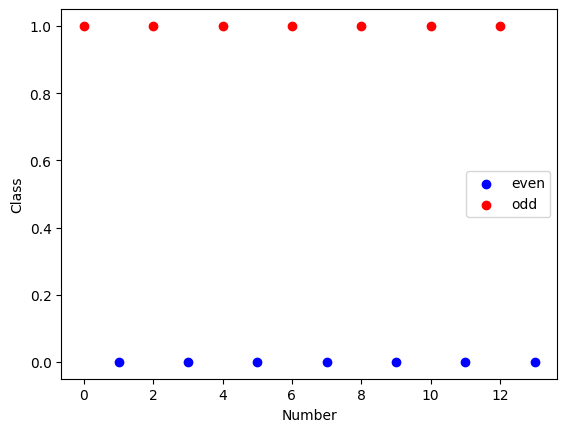

In [19]:
import matplotlib.pyplot as plt

X = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0])
y = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0])  # 1 for odd, 0 for even

plt.scatter(X[y==0], y[y==0], color='blue', label='even')  # even numbers
plt.scatter(X[y==1], y[y==1], color='red', label='odd')  # odd numbers

plt.xlabel('Number')
plt.ylabel('Class')
plt.legend()
plt.show()

## But lets say we want to build a model that checks whether / not a number is greater than 2, we could build that quite easily.
### (We already have built the model, only need to modify the dataset)

In [67]:
# We only check if/not a number is greater than 2
X=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([0,0,0,1,1,1])
w=np.random.rand()
b=0
alpha=0.1
iterations=100000

In [68]:
w,b=train(X,y,w,b,alpha,iterations)

At iteration number 0. the cost is 0.5653848124835007, 'w' is 0.28267627449927296 and 'b' is -0.015156569579511968
At iteration number 100. the cost is 0.3294010448256633, 'w' is 0.8151070038807329 and 'b' is -1.4221657018991105
At iteration number 200. the cost is 0.24636704442647497, 'w' is 1.1126992116870638 and 'b' is -2.278005532946667
At iteration number 300. the cost is 0.20409284045403694, 'w' is 1.3319251973807935 and 'b' is -2.888427336699404
At iteration number 400. the cost is 0.17787857364847234, 'w' is 1.5077499931733953 and 'b' is -3.368623822535266
At iteration number 500. the cost is 0.15965587171962023, 'w' is 1.6561393324735765 and 'b' is -3.7685788991642073
At iteration number 600. the cost is 0.14603313559729855, 'w' is 1.7855743962894504 and 'b' is -4.114076126306706
At iteration number 700. the cost is 0.13532960858328028, 'w' is 1.901080328631281 and 'b' is -4.420089376276084
At iteration number 800. the cost is 0.12661206861313792, 'w' is 2.0058787641775386 and

In [69]:
a=np.array([-100,-1,1,2,9,10,15,18,20]).reshape(-1, 1)
prediction=predict(a,w,b)
print(prediction)

[0, 0, 0, 0, 1, 1, 1, 1, 1]


<ipython-input-26-aec63ba91d1a>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


## As we see, the above model correctly predicts whether/not a number is greater than `2`